## 1.Importing the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk
import re
import string

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [53]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 38 kB/s 


In [54]:
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [7]:
import keras
from keras_preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer


In [8]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
from bs4 import BeautifulSoup

In [10]:
 nltk.download('punkt')
 nltk.download('wordnet')
 nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

## 2.Loading the Dataset

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
df_fake=pd.read_csv('/content/drive/MyDrive/Imarticus/sentiment/fake_news/Fake.csv')

In [13]:
df_fake.shape

(23481, 4)

In [14]:
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [15]:
df_true=pd.read_csv('/content/drive/MyDrive/Imarticus/sentiment/fake_news/True.csv')

In [16]:
df_true.shape

(21417, 4)

In [17]:
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


## 3.Exploratory Data Analysis

In [18]:
#Adding a new column to classify the data

In [19]:
df_fake['result']=0
df_true['result']=1

In [20]:
#Concatenating two datasets to get a single dataset

In [21]:
df_twitter=pd.concat([df_fake,df_true],ignore_index=True,sort=False)
df_twitter.head()

,title,text,subject,date,result
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [22]:
#Checking for Null Values

In [23]:
df_twitter.isnull().sum()

title      0
text       0
subject    0
date       0
result     0
dtype: int64

We can see that there are no missing values in the data.

In [24]:
#Checking for Duplictates

In [25]:
sum(df_twitter.duplicated())

209

In [26]:
#Dropping the Duplicates

In [27]:
df_twitter=df_twitter.drop_duplicates()
df_twitter.shape

(44689, 5)

In [28]:
#Visualisations

In [29]:
#Checking the distribution of Fake and True data

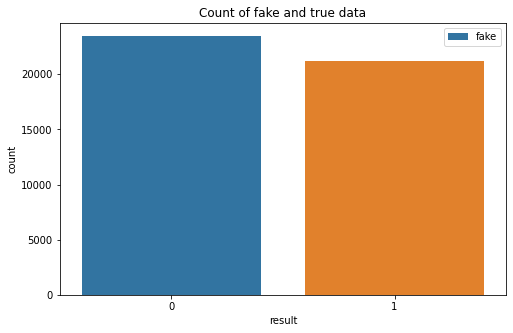

In [30]:
plt.figure(figsize=(8,5))
sns.countplot(x='result',data=df_twitter)
plt.legend(labels=['fake','true'],loc='upper right')
plt.title('Count of fake and true data')
plt.show()

In [31]:
df_twitter.subject.value_counts()

politicsNews       11220
worldnews           9991
News                9050
politics            6838
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [32]:
#Distribution of data across subjects

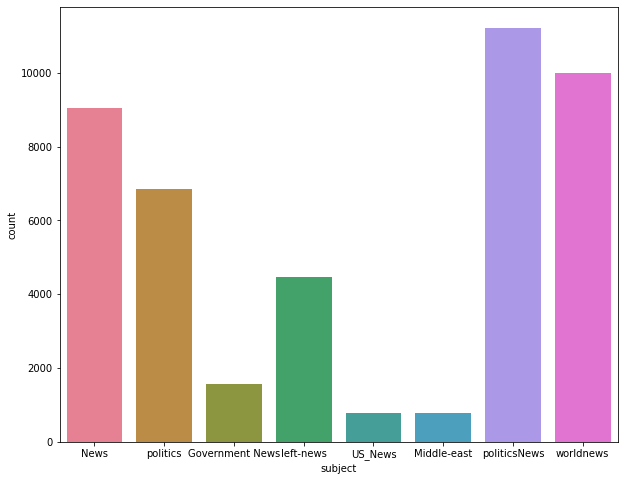

In [33]:
plt.figure(figsize=(10,8))
sns.countplot(x='subject',data=df_twitter,palette='husl')
plt.show()

In [34]:
#Checking out the fake and true across the subjects

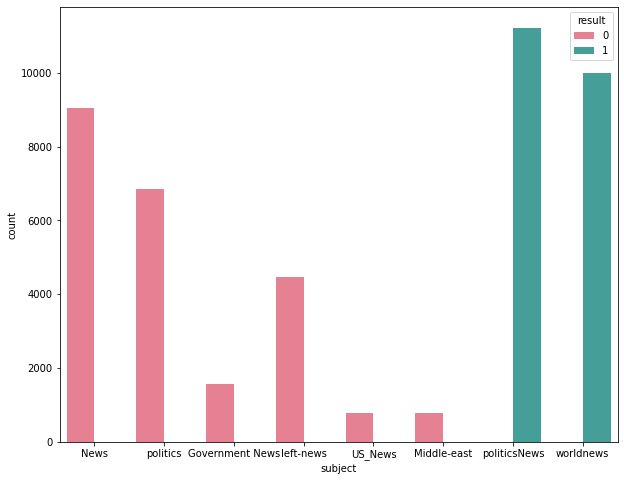

In [35]:
plt.figure(figsize=(10,8))
sns.countplot(x='subject',hue='result',data=df_twitter,palette='husl')
plt.show()

In [36]:
df_twitter.groupby('subject')['result'].value_counts()

subject          result
Government News  0          1570
Middle-east      0           778
News             0          9050
US_News          0           783
left-news        0          4459
politics         0          6838
politicsNews     1         11220
worldnews        1          9991
Name: result, dtype: int64

In [37]:
df_twitter

,title,text,subject,date,result
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


We will consider the text column and the rsesult column for our analysis.

## 4.Text Processing for Sentiment Analysis

In [38]:
#Removal of HTML contents:
def remove_html(text):
    soup=BeautifulSoup(text,'html.parser')
    return soup.get_text()

#Removal of Punctuation Marks:
def remove_punctuations(text):
    return re.sub('\[[^]]*\]','',text)
    
#Removal of special characters:
def remove_characters(text):
    return re.sub('[^a-zA-Z]',' ',text)

#Removal of stopwords:
def remove_stopwords_lemmatization(text):
    final_text=[]
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    for word in text:
        if word not in set(stopwords.words('english')):
            lemma=nltk.WordNetLemmatizer()
            word=lemma.lemmatize(word)
            final_text.append(word)
    return ' '.join(final_text)      

In [39]:
def cleaning(text):
    text=remove_html(text)
    text=remove_punctuations(text)
    text=remove_characters(text)
    text=remove_stopwords_lemmatization(text)
    return text

#Applying the function
df_twitter['text']=df_twitter['text'].apply(cleaning)

## 5.Splitting into X and y

In [41]:
X=df_twitter['text']
y=df_twitter['result']

In [42]:
tokenizer = Tokenizer(num_words=1000, split=' ') 
tokenizer.fit_on_texts(X)
X= tokenizer.texts_to_sequences(X)
X= pad_sequences(X)

In [43]:
X

array([[  0,   0,   0, ..., 656, 475,  60],
       [  0,   0,   0, ..., 230, 475,  60],
       [  0,   0,   0, ..., 656, 475,  60],
       ...,
       [  0,   0,   0, ...,  21, 632,   2],
       [  0,   0,   0, ..., 433, 402, 541],
       [  0,   0,   0, ..., 653, 248, 381]], dtype=int32)

In [44]:
X.shape,y.shape

((44689, 2707), (44689,))

## 6.Train Test Split

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)

In [47]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((35751, 2707), (8938, 2707), (35751,), (8938,))

## 7.Scaling the data

In [49]:
sc=StandardScaler()

X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

## 8.Model Building

In [55]:
models=[LogisticRegression(),SGDClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),
        RandomForestClassifier(n_estimators=100),XGBClassifier(dual=False),
       AdaBoostClassifier(),GradientBoostingClassifier(),
       LGBMClassifier(),CatBoostClassifier(),GaussianNB()]

In [56]:
for i in range(11):
    models[i].fit(X_train_scaled,y_train)
    
    print(f'{models[i]}: ')
    y_pred=models[i].predict(X_test_scaled)
    
    print('Accuracy: ',accuracy_score(y_test,y_pred))
    
    print('Confusion Matrix: ')
    print(confusion_matrix(y_test,y_pred))
    
    print('Classification Report: ')
    print(classification_report(y_test,y_pred))
    print()

LogisticRegression(): 
Accuracy:  0.6249720295368091
Confusion Matrix: 
[[3346 1389]
 [1963 2240]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.63      0.71      0.67      4735
           1       0.62      0.53      0.57      4203

    accuracy                           0.62      8938
   macro avg       0.62      0.62      0.62      8938
weighted avg       0.62      0.62      0.62      8938


SGDClassifier(): 
Accuracy:  0.6056164690087268
Confusion Matrix: 
[[3139 1596]
 [1929 2274]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.62      0.66      0.64      4735
           1       0.59      0.54      0.56      4203

    accuracy                           0.61      8938
   macro avg       0.60      0.60      0.60      8938
weighted avg       0.60      0.61      0.60      8938


DecisionTreeClassifier(): 
Accuracy:  0.8607070933094652
Confusion Matrix: 
[[4268  467]
 [ 778 3425]]


We can see that CatBoostClassifier model performed the best as compared to others, with 92% accuracy and 97% recall score.